# Explorativ Data Analyse

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
from IPython.display import display

sns.set()

In [2]:
df_data = pd.read_csv('data/ecommerce-data.zip', encoding='ISO-8859-1')

In [3]:
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df_data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
360689,568301,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,9/26/2011 12:45,4.95,16383.0,United Kingdom
7705,537051,21916,SET 12 RETRO WHITE CHALK STICKS,1,12/5/2010 11:12,0.42,15708.0,United Kingdom
267487,560300,22709,WRAP WEDDING DAY,25,7/18/2011 10:29,0.42,14911.0,EIRE
517420,580054,22189,CREAM HEART CARD HOLDER,2,12/1/2011 13:08,3.95,18122.0,United Kingdom
267471,560299,21993,FLORAL FOLK STATIONERY SET,12,7/18/2011 10:28,1.25,17593.0,United Kingdom
439204,574368,23583,LUNCH BAG PAISLEY PARK,10,11/4/2011 10:59,1.65,13004.0,United Kingdom
187092,552949,22291,HANGING CHICK CREAM DECORATION,5,5/12/2011 12:01,1.45,16033.0,United Kingdom
291444,562453,21745,GAOLERS KEYS DECORATIVE GARDEN,4,8/5/2011 10:31,3.75,18097.0,United Kingdom
364326,568657,47566B,TEA TIME PARTY BUNTING,1,9/28/2011 12:22,4.95,16460.0,United Kingdom
161315,550474,22957,SET 3 PAPER VINTAGE CHICK PAPER EGG,3,4/18/2011 13:58,5.79,NaN,United Kingdom


Lad os først forstå dataset.

Hvor mange rækker er der?

In [5]:
print(f'Antal transaktioner: {len(df_data)}')

Antal transaktioner: 541909


Har vi dubletter?

In [6]:
n_duplicates = len(df_data[df_data.duplicated()])
print(f'Antallet af dubletter: {n_duplicates}')

Antallet af dubletter: 5268


Der er nogle enkelte dubletter. Disse vil ødelægge vores statistikker, så vi sletter dem.

In [7]:
df_data[df_data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [8]:
n_before = len(df_data)
df_data.drop_duplicates(inplace=True)
n_after = len(df_data)
print(f'Slettet {n_before - n_after} dubletter.')

Slettet 5268 dubletter.


Hvor mange værdier manger vi?

In [9]:
df_na = pd.DataFrame(df_data.isnull().sum(), columns=['NumberOfMissingValues']).T
df_na

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
NumberOfMissingValues,0,0,1454,0,0,0,135037,0


In [10]:
n_transactions_with_no_cust_info = df_na['CustomerID'][0]
pct_transactions_no_cust = n_transactions_with_no_cust_info / len(df_data) * 100
print(f'Andel af transaktioner uden kunde-ID: {pct_transactions_no_cust:.2f}%')

Andel af transaktioner uden kunde-ID: 25.16%


**OBS!** 25% transaktionerne er uden kunde-ID. Forklaring kunne være at kunde-ID er kun sat til transaktioner fra grossister, men løssalg til brugere ikke har en kunde-ID. Bekræft denne hypotese.

## Split data i to DateFrames

Data er joinet. Vi splitter det op for at få et bedre overblik.

In [11]:
df_invoices = df_data[['StockCode', 'InvoiceNo']].groupby(['InvoiceNo']).count()
df_invoices = df_invoices.rename(columns={'StockCode': 'NumberOfItems'})

In [12]:
df_data['Revenue'] = df_data['Quantity'] * df_data['UnitPrice']
df_invoices['TotalRevenue'] = df_data[['Revenue', 'InvoiceNo']].groupby(['InvoiceNo']).sum()

In [13]:
# Antager at kunde, land og dato er angivet på faktura-niveau
df_invoices['CustomerID'] = df_data[['CustomerID', 'InvoiceNo']].groupby(['InvoiceNo']).first()
df_invoices['HasCustomerID'] = df_invoices[['CustomerID']].isna() == False
df_invoices['CustomerID'] = df_invoices.CustomerID.map(lambda v: -1 if pd.isna(v) else int(v)).astype('category')

df_invoices['Country'] = df_data[['Country', 'InvoiceNo']].groupby(['InvoiceNo']).first()

df_invoices['Date'] = df_data[['InvoiceDate', 'InvoiceNo']].groupby(['InvoiceNo']).first().astype('datetime64[ns]')
df_invoices['Year'] = pd.DatetimeIndex(df_invoices['Date']).year
df_invoices['Month'] = pd.DatetimeIndex(df_invoices['Date']).month
df_invoices['DayOfWeek'] = pd.to_datetime(df_invoices['Date']).dt.day_name()
df_invoices['YearAndMonth'] = pd.to_datetime(df_invoices['Date']).dt.to_period('M')

In [14]:
df_invoices.reset_index(inplace=True)

In [15]:
df_invoices.sample(10)

,InvoiceNo,NumberOfItems,TotalRevenue,CustomerID,HasCustomerID,Country,Date,Year,Month,DayOfWeek,YearAndMonth
7052,551124,10,291.90,15738,True,United Kingdom,2011-04-26 12:47:00,2011,4,Tuesday,2011-04
15748,568880,18,100.40,14524,True,United Kingdom,2011-09-29 12:39:00,2011,9,Thursday,2011-09
25295,C573219,5,-14.63,14415,True,United Kingdom,2011-10-28 11:49:00,2011,10,Friday,2011-10
10115,557230,8,135.00,15181,True,United Kingdom,2011-06-17 13:57:00,2011,6,Friday,2011-06
8609,554085,11,182.60,16945,True,United Kingdom,2011-05-22 11:53:00,2011,5,Sunday,2011-05
20069,577503,37,198.80,18110,True,United Kingdom,2011-11-20 12:34:00,2011,11,Sunday,2011-11
16286,569868,30,412.17,13018,True,United Kingdom,2011-10-06 14:59:00,2011,10,Thursday,2011-10
18728,574877,17,291.54,16637,True,United Kingdom,2011-11-07 13:17:00,2011,11,Monday,2011-11
4753,546637,3,292.30,13854,True,United Kingdom,2011-03-15 12:37:00,2011,3,Tuesday,2011-03
19008,575491,181,1495.06,15531,True,United Kingdom,2011-11-09 17:47:00,2011,11,Wednesday,2011-11


In [16]:
df_invoice_lines = df_data[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'Revenue']]

In [17]:
df_invoice_lines.sample(10)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Revenue
128933,547367,82494L,WOODEN FRAME ANTIQUE WHITE,1,2.95,2.95
368571,568987,21238,RED RETROSPOT CUP,24,0.85,20.40
70977,542107,21166,COOK WITH WINE METAL SIGN,3,1.95,5.85
515652,579777,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,5,1.63,8.15
458764,575849,22553,PLASTERS IN TIN SKULLS,12,1.65,19.80
508092,579196,22110,BIRD HOUSE HOT WATER BOTTLE,1,7.46,7.46
417145,572650,82583,HOT BATHS METAL SIGN,4,2.10,8.40
176102,551995,85131B,BEADED CRYSTAL HEART GREEN ON STICK,5,0.83,4.15
394734,570880,23438,RED SPOT GIFT BAG LARGE,12,1.25,15.00
389798,570488,22621,TRADITIONAL KNITTING NANCY,2,3.29,6.58


## Faktura nummer (InvoiceNo)

Lad os først undersøge de enkelte kolonner.

In [18]:
df_invoices.InvoiceNo

0         536365
1         536366
2         536367
3         536368
4         536369
          ...   
25895    C581484
25896    C581490
25897    C581499
25898    C581568
25899    C581569
Name: InvoiceNo, Length: 25900, dtype: object

Nogle fakturanumre har et C foran. Hvorfor?

In [19]:
df_invoices['AllDigits'] = df_invoices.InvoiceNo.map(lambda v: v.isdigit())

In [20]:
df_invoices

,InvoiceNo,NumberOfItems,TotalRevenue,CustomerID,HasCustomerID,Country,Date,Year,Month,DayOfWeek,YearAndMonth,AllDigits
0,536365,7,139.12,17850,True,United Kingdom,2010-12-01 08:26:00,2010,12,Wednesday,2010-12,True
1,536366,2,22.20,17850,True,United Kingdom,2010-12-01 08:28:00,2010,12,Wednesday,2010-12,True
2,536367,12,278.73,13047,True,United Kingdom,2010-12-01 08:34:00,2010,12,Wednesday,2010-12,True
3,536368,4,70.05,13047,True,United Kingdom,2010-12-01 08:34:00,2010,12,Wednesday,2010-12,True
4,536369,1,17.85,13047,True,United Kingdom,2010-12-01 08:35:00,2010,12,Wednesday,2010-12,True
...,...,...,...,...,...,...,...,...,...,...,...,...
25895,C581484,1,-168469.60,16446,True,United Kingdom,2011-12-09 09:27:00,2011,12,Friday,2011-12,False
25896,C581490,2,-32.53,14397,True,United Kingdom,2011-12-09 09:57:00,2011,12,Friday,2011-12,False
25897,C581499,1,-224.69,15498,True,United Kingdom,2011-12-09 10:28:00,2011,12,Friday,2011-12,False
25898,C581568,1,-54.75,15311,True,United Kingdom,2011-12-09 11:57:00,2011,12,Friday,2011-12,False


Interessant. Indtægt er negativt. Måske indikerer 'C'-et en kreditnota?
Kan vi bekræfte den antagelse?

In [21]:
df_invoices[df_invoices.AllDigits == False][['TotalRevenue']].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalRevenue,3839.0,-235.749359,3209.245653,-168469.6,-41.375,-16.85,-7.95,11062.06


Det er ikke alle steder hvor det er negativt. Lad os finde faktura med positiv indtjening.

In [22]:
df_invoices[(df_invoices.AllDigits == False) & (df_invoices.TotalRevenue >= 0)]

,InvoiceNo,NumberOfItems,TotalRevenue,CustomerID,HasCustomerID,Country,Date,Year,Month,DayOfWeek,YearAndMonth,AllDigits
22061,A563185,1,11062.06,-1,False,United Kingdom,2011-08-12 14:50:00,2011,8,Friday,2011-08,False


Der er faktura som starter med A. Hvad mon det betyder?

In [23]:
df_invoice_lines[df_invoice_lines.InvoiceNo.str.startswith('A')]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Revenue
299982,A563185,B,Adjust bad debt,1,11062.06,11062.06
299983,A563186,B,Adjust bad debt,1,-11062.06,-11062.06
299984,A563187,B,Adjust bad debt,1,-11062.06,-11062.06


Det lader til at der er tale om afskrivningsposter.

In [24]:
filter_A = df_invoices.InvoiceNo.str.startswith('A')
filter_C = df_invoices.InvoiceNo.str.startswith('C')
n_invoices_A = len(df_invoices[filter_A])
n_invoices_C = len(df_invoices[filter_C])
n_invoices_rest = len(df_invoices[~filter_A & ~filter_C])
n_invoices_total = len(df_invoices)

print(f'Antal faktura: {n_invoices_total}')
print(f'Antal faktura med A-nummer: {n_invoices_A}')
print(f'Antal faktura med C-nummer: {n_invoices_C}')
print(f'Antal faktura uden prefix: {n_invoices_rest}')

Antal faktura: 25900
Antal faktura med A-nummer: 3
Antal faktura med C-nummer: 3836
Antal faktura uden prefix: 22061


Umiddelbart ser det ud som om at der er tre typer af faktura:
- Salgsfaktura (intet bogstav i fakturanummer)
- Kreditnota (fakturanummer starter med et C)
- Afskrivning (fakturanummer starter med et A)

In [25]:
def get_type(invoice_no):
    if invoice_no[0] == 'A':
        return 'Write-Off'
    if invoice_no[0] == 'C':
        return 'Credit Note'
    return 'Standard'

df_invoices['Type'] = df_invoices.InvoiceNo.map(get_type)

In [26]:
df_invoices.head()

,InvoiceNo,NumberOfItems,TotalRevenue,CustomerID,HasCustomerID,Country,Date,Year,Month,DayOfWeek,YearAndMonth,AllDigits,Type
0,536365,7,139.12,17850,True,United Kingdom,2010-12-01 08:26:00,2010,12,Wednesday,2010-12,True,Standard
1,536366,2,22.20,17850,True,United Kingdom,2010-12-01 08:28:00,2010,12,Wednesday,2010-12,True,Standard
2,536367,12,278.73,13047,True,United Kingdom,2010-12-01 08:34:00,2010,12,Wednesday,2010-12,True,Standard
3,536368,4,70.05,13047,True,United Kingdom,2010-12-01 08:34:00,2010,12,Wednesday,2010-12,True,Standard
4,536369,1,17.85,13047,True,United Kingdom,2010-12-01 08:35:00,2010,12,Wednesday,2010-12,True,Standard


## Omsætning per faktura

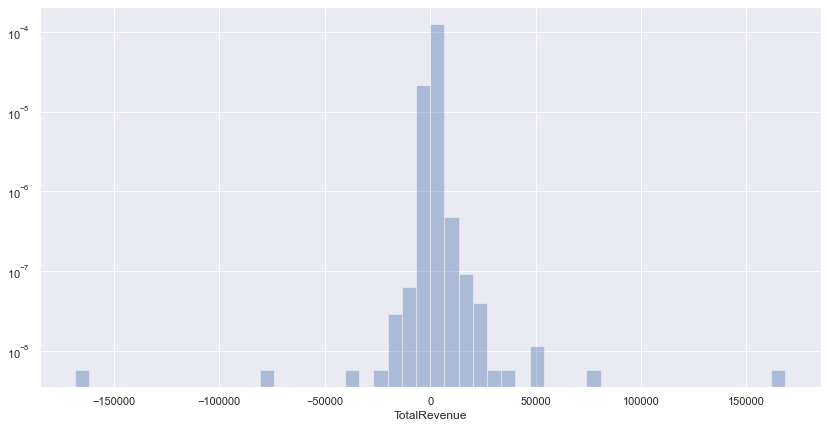

In [27]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.distplot(df_invoices.TotalRevenue, kde=False, norm_hist=True, ax=ax)
ax.set_yscale('log')

Der er faktura med store positive og negative tal. Lad os kigge på dem.

In [28]:
df_invoices[(df_invoices.TotalRevenue < -50000) | (df_invoices.TotalRevenue > 50000)]

,InvoiceNo,NumberOfItems,TotalRevenue,CustomerID,HasCustomerID,Country,Date,Year,Month,DayOfWeek,YearAndMonth,AllDigits,Type
2303,541431,1,77183.60,12346,True,United Kingdom,2011-01-18 10:01:00,2011,1,Tuesday,2011-01,True,Standard
18776,574941,101,52940.94,-1,False,United Kingdom,2011-11-07 17:42:00,2011,11,Monday,2011-11,True,Standard
19468,576365,99,50653.91,-1,False,United Kingdom,2011-11-14 17:55:00,2011,11,Monday,2011-11,True,Standard
22025,581483,1,168469.60,16446,True,United Kingdom,2011-12-09 09:15:00,2011,12,Friday,2011-12,True,Standard
22510,C541433,1,-77183.60,12346,True,United Kingdom,2011-01-18 10:17:00,2011,1,Tuesday,2011-01,False,Credit Note
25895,C581484,1,-168469.60,16446,True,United Kingdom,2011-12-09 09:27:00,2011,12,Friday,2011-12,False,Credit Note


- Faktura 541431 blev krediteret -- kreditnota C541433
- Faktura 581483 blev krediteret -- kreditnota C581484
- Faktura 574941 og 576365 ser umiddelbart OK ud. Der er dog ingen kunde-ID på dem. Det kunne tænkes at det er salg til grosister.

### Omsætning per måned

In [29]:
filter_with_cust_id = df_invoices.HasCustomerID
df_rev_data = df_invoices[filter_with_cust_id][['TotalRevenue', 'YearAndMonth']].groupby(['YearAndMonth']).sum()
df_rev_data = df_rev_data.rename(columns={'TotalRevenue': 'Kunder'})

filter_without_cust_id = df_invoices.HasCustomerID == False
df_rev_data['Løssalg'] = df_invoices[filter_without_cust_id][['TotalRevenue', 'YearAndMonth']].groupby(['YearAndMonth']).sum()

df_rev_data.reset_index(inplace=True)

In [30]:
df_rev_data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
YearAndMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
Kunder,552373,473732,435534,578576,425223,647012,606863,573112,615078,929356,973306,1.12682e+06,341539
Løssalg,194351,84716.7,61492.3,103438,67145.2,75082.4,83114.7,107045,66308.4,88240.5,96061.9,329331,91161.6


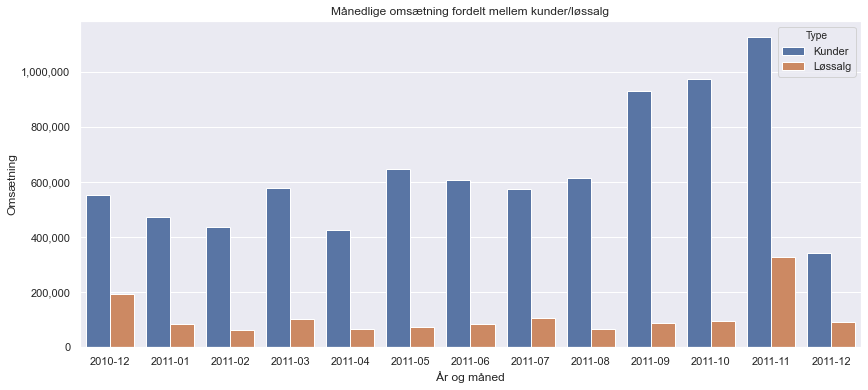

In [31]:
fig, ax = plt.subplots(figsize=(14, 6))

df_plot_data = df_rev_data.melt('YearAndMonth', var_name='Type', value_name='Value')
sns.barplot(x='YearAndMonth', y='Value', hue='Type', data=df_plot_data, ax=ax)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel('År og måned')
ax.set_ylabel('Omsætning')
ax.set_title('Månedlige omsætning fordelt mellem kunder/løssalg');
# fig.savefig('figures/monthly-revenue.pdf');

- Faste kunder står for langt størstedelen af den månedlige omsætning. Faste kunder er grossister? Måske skal vi fokusere på dem.
- Omsætning er størst i november. Kan skyldes Black Friday. Efterfulgt af september og oktober. Måske skal grossister fylde lagre i månederne op til Black Friday.
- Vi skal nok se bort fra tallene i december 2011 da vi kun har data til og med den 9. december 2011

### Omsætning per kunde

In [32]:
df_invoice_customers = df_invoices[df_invoices.HasCustomerID == True]

df_rev_by_cust = df_invoice_customers[['CustomerID', 'InvoiceNo']].groupby('CustomerID').count()
df_rev_by_cust = df_rev_by_cust.rename(columns={'InvoiceNo': 'NumberOfInvoices'})

df_rev_by_cust['TotalRevenue'] = df_invoice_customers[['CustomerID', 'TotalRevenue']].groupby('CustomerID').sum()
df_rev_by_cust['AvgRevenuePerInvoice'] = df_rev_by_cust['TotalRevenue'] / df_rev_by_cust['NumberOfInvoices']
df_rev_by_cust['Country'] = df_invoice_customers[['CustomerID', 'Country']].groupby('CustomerID').first()

In [33]:
df_rev_by_cust.head()

,NumberOfInvoices,TotalRevenue,AvgRevenuePerInvoice,Country
CustomerID,,,,
-1,0,0.00,NaN,NaN
12346,2,0.00,0.000000,United Kingdom
12347,7,4310.00,615.714286,Iceland
12348,4,1797.24,449.310000,Finland
12349,1,1757.55,1757.550000,Italy


In [34]:
total_result = df_invoices.TotalRevenue.sum()
total_result_customers = df_rev_by_cust.TotalRevenue.sum()

print(f'Samlet resultat på tværs af kunder og løssalg: £{total_result:,.0f}.')
print(f'Samlet resultat på registrede kunder £{total_result_customers:,.0f}.')

Samlet resultat på tværs af kunder og løssalg: £9,726,007.
Samlet resultat på registrede kunder £8,278,519.


Lad os kigge på vores største kunder.

In [35]:
df_plot_data = df_rev_by_cust.sort_values('TotalRevenue', ascending=False)
n_top = 20
df_plot_data = df_plot_data[['TotalRevenue']].iloc[0:n_top]
# df_plot_data.T

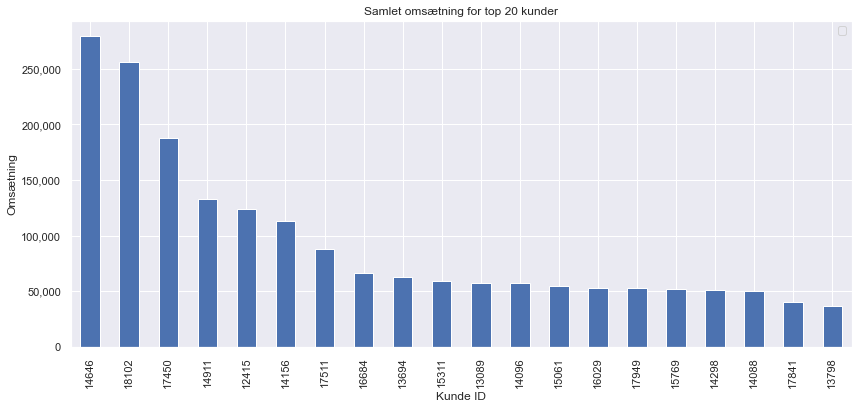

In [36]:
fig, ax = plt.subplots(figsize=(14, 6))
df_plot_data.plot(kind='bar', ax=ax)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend([])
ax.set_xlabel('Kunde ID')
ax.set_ylabel('Omsætning')
ax.set_title(f'Samlet omsætning for top {n_top} kunder');
# fig.tight_layout(); fig.savefig(f'figures/revenue-top-{n_top}-customers.pdf');

### Omsætning per land

In [37]:
df_rev_by_country = (df_rev_by_cust[['TotalRevenue', 'Country']]
   .groupby('Country')
   .sum()
   .sort_values('TotalRevenue', ascending=False)
)

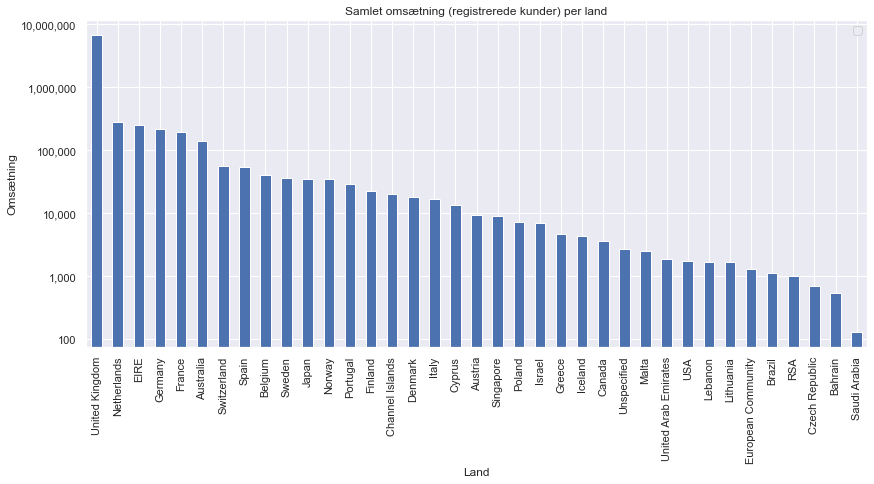

In [38]:
fig, ax = plt.subplots(figsize=(14, 6))

df_rev_by_country.plot(kind='bar', ax=ax)
ax.legend([])
ax.set_xlabel('Land')
ax.set_ylabel('Omsætning')
ax.set_yscale('log');
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_title('Samlet omsætning (registrerede kunder) per land');
# fig.tight_layout(); fig.savefig(f'figures/revenue-per-country.pdf');

- Salg til kunder i England dominerer.

In [39]:
df_rev_by_country.head(2)

,TotalRevenue
Country,
United Kingdom,6747156.154
Netherlands,284661.540


### Kunder per land

In [40]:
df_cust_count_by_country = (df_rev_by_cust[['TotalRevenue', 'Country']]
   .groupby('Country')
   .count()
   .sort_values('TotalRevenue', ascending=False)
   .rename(columns={'TotalRevenue': 'CustomerCount'})
)

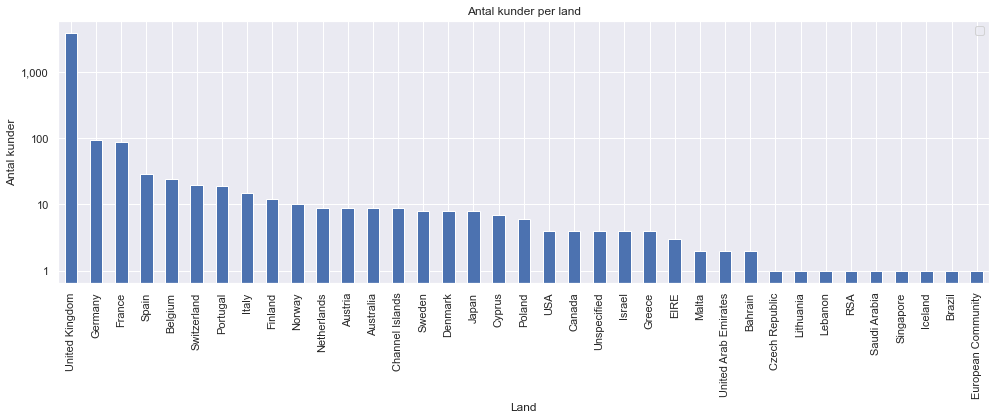

In [41]:
fig, ax = plt.subplots(figsize=(14, 6))
df_cust_count_by_country.plot(kind='bar', ax=ax)
ax.legend([])
ax.set_yscale('log')
ax.set_xlabel('Land')
ax.set_ylabel('Antal kunder')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_title('Antal kunder per land');
fig.tight_layout(); fig.savefig(f'figures/customer-count-per-country.pdf');

- Som forventet, de fleste kunder er fra England. Det kan godt betale sig at fokusere på UK.

In [42]:
df_cust_count_by_country.head(2)

,CustomerCount
Country,
United Kingdom,3950
Germany,95


In [43]:
df_rev_by_country.head()

,TotalRevenue
Country,
United Kingdom,6747156.154
Netherlands,284661.540
EIRE,250001.780
Germany,221509.470
France,196626.050


In [44]:
df_rev_cust_count_by_country = pd.merge(
    left=df_cust_count_by_country,
    right=df_rev_by_country,
    left_index=True,
    right_index=True
)

In [45]:
df_rev_cust_count_by_country['AvgRevenuePerCustomer'] = (
    df_rev_cust_count_by_country['TotalRevenue'] / df_rev_cust_count_by_country['CustomerCount'])

In [46]:
df_rev_cust_count_by_country.sort_values('AvgRevenuePerCustomer', ascending=False, inplace=True)

In [47]:
df_rev_cust_count_by_country.head()

,CustomerCount,TotalRevenue,AvgRevenuePerCustomer
Country,,,
EIRE,3,250001.78,83333.926667
Netherlands,9,284661.54,31629.060000
Australia,9,138399.91,15377.767778
Singapore,1,9120.39,9120.390000
Sweden,8,36585.41,4573.176250


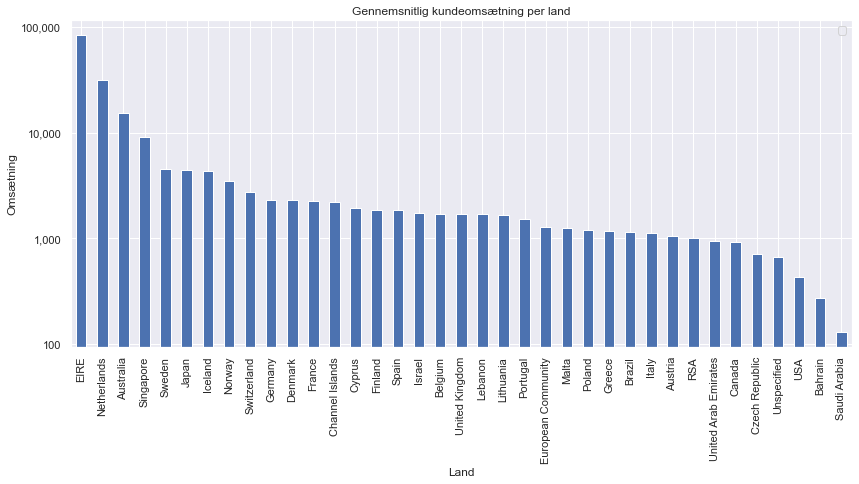

In [48]:
fig, ax = plt.subplots(figsize=(14, 6))
df_rev_cust_count_by_country[['AvgRevenuePerCustomer']].plot(kind='bar', ax=ax)
ax.legend([])
ax.set_yscale('log')
ax.set_xlabel('Land')
ax.set_ylabel('Omsætning')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_title('Gennemsnitlig kundeomsætning per land');
# fig.tight_layout(); fig.savefig(f'figures/avg-customer-revenue-per-country.pdf');

In [49]:
df_rev_cust_count_by_country.head(20)

,CustomerCount,TotalRevenue,AvgRevenuePerCustomer
Country,,,
EIRE,3,250001.780,83333.926667
Netherlands,9,284661.540,31629.060000
Australia,9,138399.910,15377.767778
Singapore,1,9120.390,9120.390000
Sweden,8,36585.410,4573.176250
Japan,8,35340.620,4417.577500
Iceland,1,4310.000,4310.000000
Norway,10,35163.460,3516.346000
Switzerland,20,55518.390,2775.919500


## Segmentering af kunder

Segmentering kan give os en bedre forståelse af behov hos kunderne. Grosister køber på baggrund af behov end de gør af lyst.

- Muligheder for vækstpotentiale blandt eksisterende kunder bl.a. ved at vide hvad de har behov for før de bestiller
- Proaktiv og data-drevet markedsføring for at tiltrække flere kunder.

Da jeg ikke har demokrafiske data, kan man forsøger sig med at segmentere udfra købsadfærd. Jeg prøver RFM-metoden (Recency, Frequency and Monetary) som går ud på at kategorisere kunder baseret på tre parametre ([kilde](https://www.putler.com/rfm-analysis/)):
- Recency: hvornår en kunde sidst har købt noget (antal dage siden sidste købsdato)
- Frequency: antallet af ordrer
- Monetary: total omsætning

Jeg mangler blot at udregne Recency.

In [50]:
df_rev_by_cust['LatestPurchaseDate'] = df_invoices.groupby('CustomerID')[['Date']].max()

# Bemærk: Antal dage siden sidste fakturadato er en simplificering
today = df_invoices.Date.max() + pd.DateOffset(days=2)
df_rev_by_cust['Recency'] = df_rev_by_cust['LatestPurchaseDate'].map(lambda v: (today - v).days)

In [51]:
df_rfm_data = df_rev_by_cust[df_rev_by_cust.TotalRevenue > 0][['Recency', 'NumberOfInvoices', 'TotalRevenue']].rename(
    columns={'Recency': 'RValue', 'NumberOfInvoices': 'FValue', 'TotalRevenue': 'MValue'}
)

In [52]:
df_rfm_data.head()

,RValue,FValue,MValue
CustomerID,,,
12347,3,7,4310.00
12348,76,4,1797.24
12349,20,1,1757.55
12350,311,1,334.40
12352,37,11,1545.41


Nu kan jeg udregne en score for hver af de tre parametre. Jeg bruger en scoringsmetode via fem kvartiler som i beskrevet i [Putler](https://www.putler.com/rfm-analysis/).

In [53]:
df_rfm_data['RScore'] = pd.qcut(df_rfm_data['RValue'], q=5, labels=[1, 2, 3, 4, 5]).astype(int)

# Rank data: https://stackoverflow.com/questions/20158597/how-to-qcut-with-non-unique-bin-edges
df_rfm_data['FScore'] = pd.qcut(df_rfm_data['FValue'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5]).astype(int)

df_rfm_data['MScore'] = pd.qcut(df_rfm_data['MValue'], q=5, labels=[1, 2, 3, 4, 5]).astype(int)

In [54]:
df_rfm_data.head()

,RValue,FValue,MValue,RScore,FScore,MScore
CustomerID,,,,,,
12347,3,7,4310.00,1,4,5
12348,76,4,1797.24,4,3,4
12349,20,1,1757.55,2,1,4
12350,311,1,334.40,5,1,2
12352,37,11,1545.41,3,5,4


Man kan kombinere Frequency-Score og Monetary-Score fordi de samlet set udtrykker  hvor meget en kunde køber.
Jeg bruger gennemsnittet af de to scores.

In [55]:
df_rfm_data['FMScore'] = np.round((df_rfm_data['FScore'] + df_rfm_data['MScore']) / 2)
df_rfm_data['FMScore'] = df_rfm_data['FMScore'].astype(int)

Data er klar til segmentering. Man kan bruge en tabel til kategorisere sine kunder. Denne tabel er fra [Putler](https://www.putler.com/rfm-analysis/):

| Customer Segment            | Recency | F & M |
|-----------------------------|---------|-------|
| Champions                   | 4-5     | 4-5   |
| Loyal Customers             | 2-5     | 3-5   |
| Potential Loyalist          | 3-5     | 1-3   |
| Recent Customers            | 4-5     | 0-1   |
| Promising                   | 3-4     | 0-1   |
| Customers Needing Attention | 2-3     | 2-3   |
| About To Sleep              | 2-3     | 0-2   |
| At Risk                     | 0-2     | 2-5   |
| Can’t Lose Them             | 0-1     | 4-5   |
| Hibernating                 | 1-2     | 1-2   |
| Lost                        | 0-2     | 0-2   |


<img src="https://uploads-ssl.webflow.com/5d28e43c1770c36fefd51134/5d2e5c092663b9516caadca8_11%20RFM%20Customer%20Segments%20-%20Retail.png" width="600" />

[Kilde](https://blog.hmscommerce.com/blog-posts/the-rfm-model-for-proven-segmentation)


*Bemærk:* Nul er ikke en mulig score ifølge deres egen artikel men tabellen indeholder 0. Retter det til da det muligvis er tale om slåfejl.

In [56]:
segment_table = {
  'Champions': [(4, 5), (4, 5)],
  'Loyal Customers': [(2, 5), (3, 5)],
  'Potential Loyalist': [(3, 5), (1, 3)],
  'Recent Customers': [(4, 5), (1, 2)],
  'Promising': [(3, 4), (1, 2)],   
  'Customers Needing Attention': [(2, 3), (2, 3)],
  'About To Sleep': [(2, 3), (1, 3)],
  'At Risk': [(1, 3), (2, 5)],
  'Can\'t Lose Them': [(1, 2), (4, 5)],
  'Hibernating': [(1, 2), (1, 2)],
  'Lost': [(1, 3), (1, 3)]
}

In [57]:
score_segment_map = dict()
for k, v in segment_table.items():
    r_range = v[0][0], v[0][1]+1
    fm_range = v[1][0], v[1][1]+1
    for i in range(*r_range):
        for j in range(*fm_range):
            score_segment_map[f'{i}{j}'] = k

In [58]:
df_rfm_data['RFMScore'] = df_rfm_data['RScore'].astype(str) + df_rfm_data['FMScore'].astype(str)

In [59]:
df_rfm_data['Segment'] = df_rfm_data['RFMScore'].map(lambda v: score_segment_map[v])

In [60]:
df_rfm_data

,RValue,FValue,MValue,RScore,FScore,MScore,FMScore,RFMScore,Segment
CustomerID,,,,,,,,,
12347,3,7,4310.00,1,4,5,4,14,Can't Lose Them
12348,76,4,1797.24,4,3,4,4,44,Loyal Customers
12349,20,1,1757.55,2,1,4,2,22,Lost
12350,311,1,334.40,5,1,2,2,52,Recent Customers
12352,37,11,1545.41,3,5,4,4,34,At Risk
...,...,...,...,...,...,...,...,...,...
18280,279,1,180.60,5,2,1,2,52,Recent Customers
18281,182,1,80.82,5,2,1,2,52,Recent Customers
18282,9,3,176.60,1,3,1,2,12,Lost


Hvordan er fordelingen af kunderne i de forskellige segmenter?

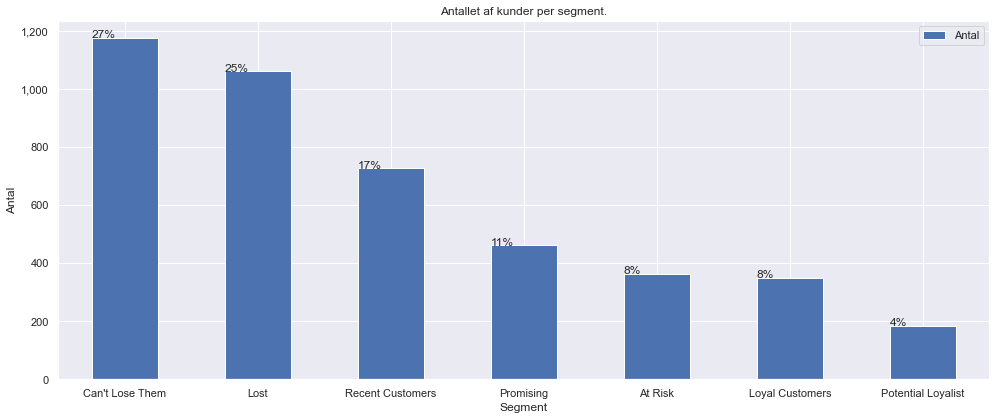

In [61]:
fig, ax = plt.subplots(figsize=(14, 6))

df_plot_data = (df_rfm_data[['RValue', 'Segment']]
       .groupby('Segment')
       .count()
       .rename(columns={'RValue':'Antal'})
       .sort_values('Antal', ascending=False)
)

df_plot_data.plot(kind='bar', ax=ax)

total_count = df_plot_data['Antal'].sum()
pct_vals = list(df_plot_data['Antal'] / total_count)
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{pct_vals[i]:.0%}', (x, y + height + 0.01))

for tick in ax.get_xticklabels():
    tick.set_rotation(0)
ax.set_xlabel('Segment')
ax.set_ylabel('Antal')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax.set_title('Antallet af kunder per segment.');
fig.tight_layout(); fig.savefig(f'figures/customer-count-per-rfm-segments.pdf');

Can't Lose Them: 27% af kunderne har lav-mellem R-score men høj FM-score
 - Lav-mellem R-score: det er noget tid siden kunderne i denne gruppe har købt noget i forhold til de andre kunder.
 - Høj FM-score: Har tidligere handlet flere gange og brugt mange penge.
 - Undersøg hvad man kan gøre for at få dem til at handle noget oftere. Spørg om deres behov via et spørgeskemaundersøgelse.
 
Lost: 25% af kunderne har lav R og FM scores.
 - Lav R-score: lang tid siden sidst handlet.
 - Lav FM-score: køber ikke ikke så tit og generelt bruger de lidt penge.
 - Man kan undersøge om det kan svare sig at bruge tid på disse kunder. Måske er de engangskunder som handler rundt i forskellige webshops. Er de pris-sensitive?
 
Recent: 17% af kunderne har høj R-score men lav-mellem FM-score
 - En stor andel af kunderne har handlet fornyelig, men har ikke brugt så store summer.
 - Man kan prøve at påvirke dem så de får et godt indtryk af webshoppen. De kan nogle gode velkomst-tilbud, gratis vareprøver mm.

Promising: 11% af kunderne har mellem R-score men lav FM-score
 - Kundegruppen har handlet for ikke længe siden, men har ikke handlet så meget og bruger ikke så mange penge.
 - Lidt ligesom de nye kunder i Recent.
 
At Risk: 8% af kunder har lav R-score men mellem-høj FM-score
 - Kunder som vi ikke har set i lang tid. Tidligere har de brugt store summer og handlet ofte.
 - Lidt ligesom *Can't Lose Them* segmentet.
 
Loyal Customers: 8% af kunderne har RFM-score i den mellem-høje ende.
 - Kundegruppen har vi set for nylig, handler ofte og bruge mange penge på vores forrretning.
 - Værd at kigge på hvilke produkter de køber for at blive klog på deres behov.
 - Nogle af disse kunder kan måske lokkes til at lave produkt-reviews. Kan muligvis være interesseret i at købe dyrere varer.
  
Potential Loyalist: 4% af kunderne har mellem-høj R-score mens FM-score ligger lavere end de loyale kunder.
 - De har handlet i nyere end den loyale kundegruppe men bruger ikke så mange penge.